C:\Users\psaur\AppData\Local\Temp\ipykernel_4908\1791396257.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


All outputs will be saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features

Evaluating AdaBoost...
Fit curve saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\AdaBoost_plots\AdaBoost_fit_curve.png
Residual plot saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\AdaBoost_plots\AdaBoost_residual_plot.png

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Residual plot saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\Optimized XGBoost (PSO)_plots\Optimized XGBoost (PSO)_residual_plot.png
Results saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\model_comparison_results.csv


C:\Users\psaur\AppData\Local\Temp\ipykernel_4908\1791396257.py:509: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


All plots saved to 'C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\model_comparison_results.pdf'

Best model (Optimized XGBoost (KOA)) saved to: C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\Output_Using_New_Features\best_concrete_model.pkl


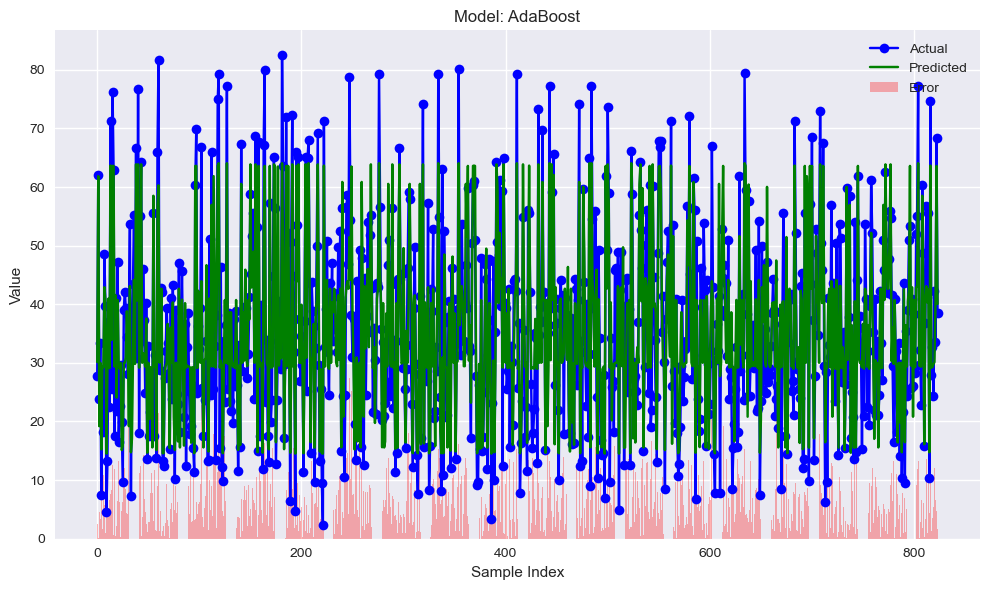

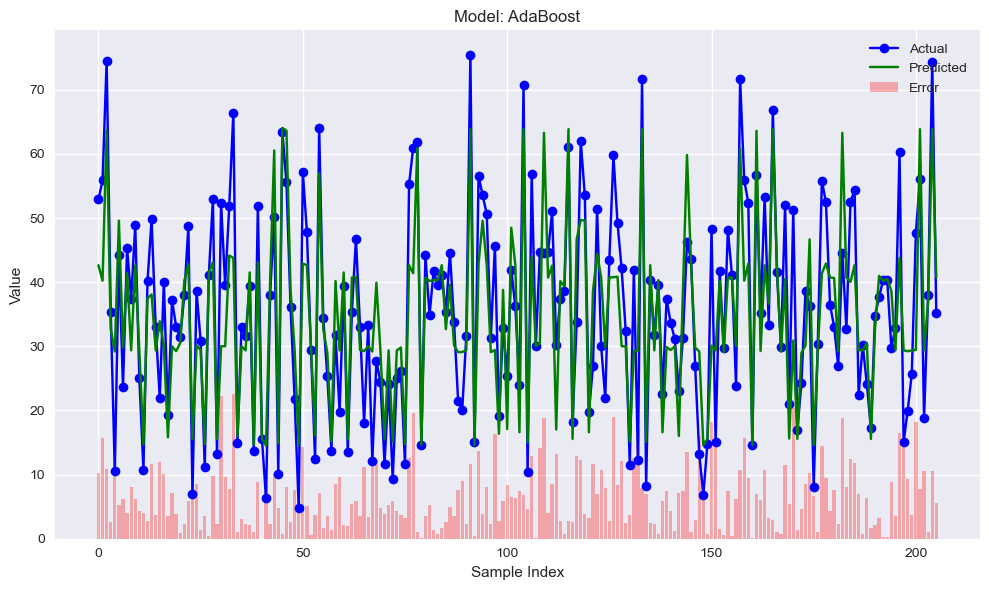

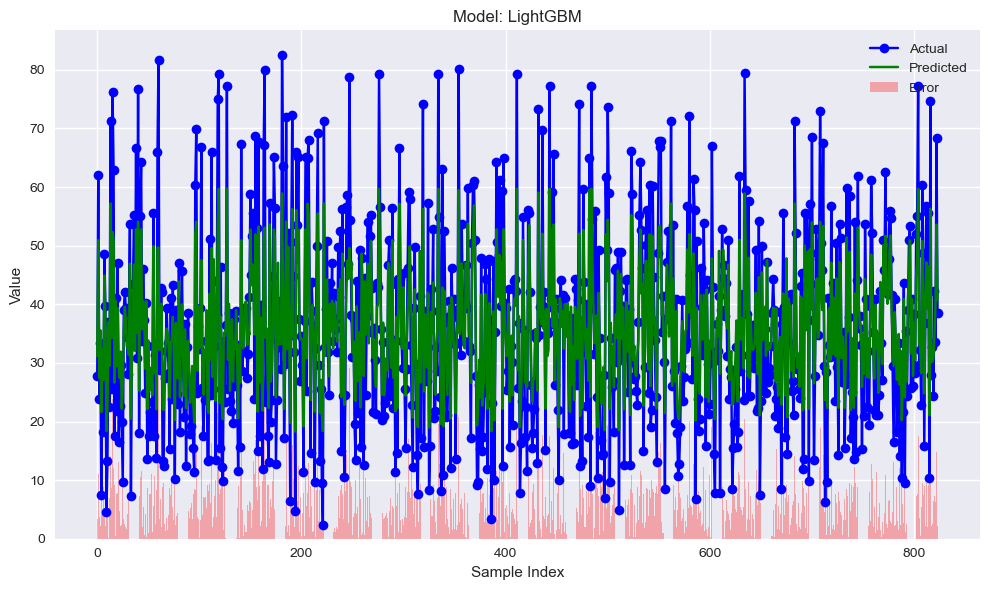

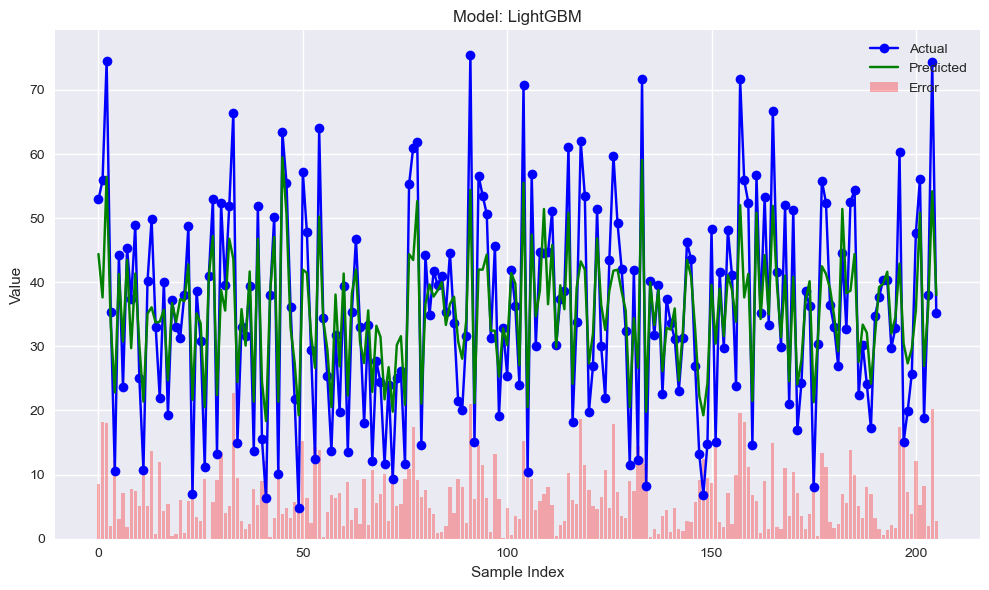

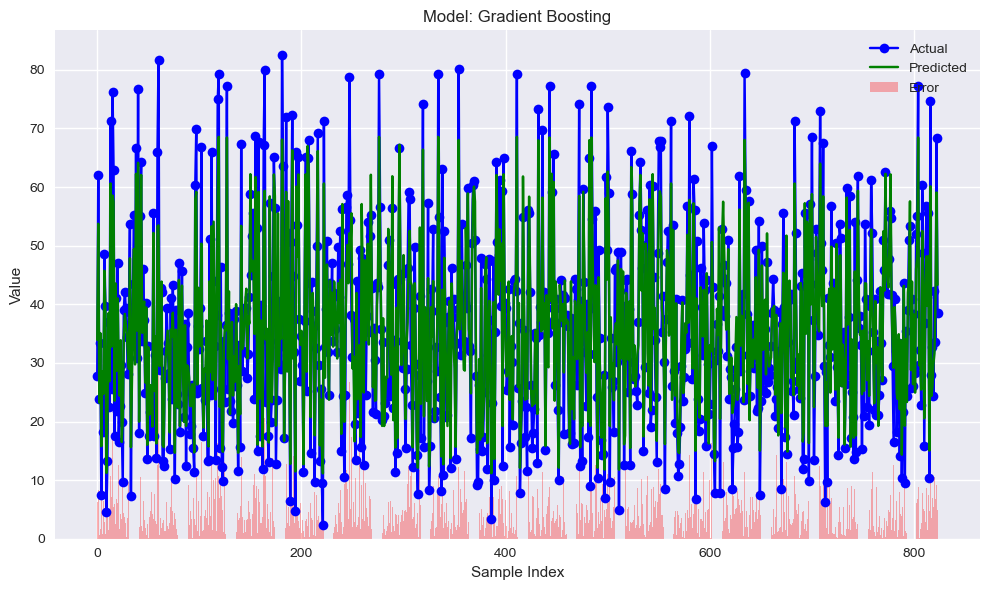

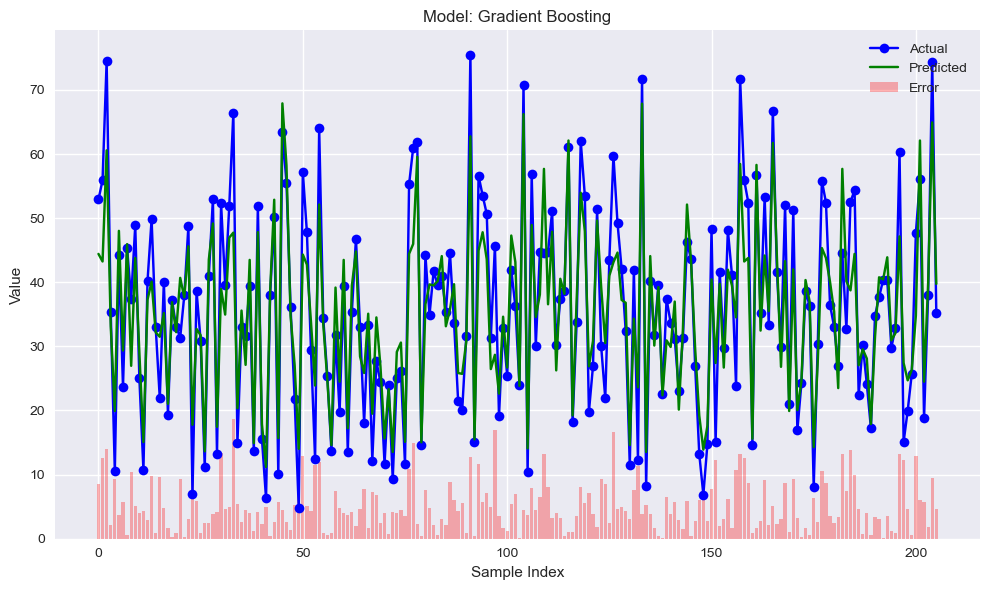

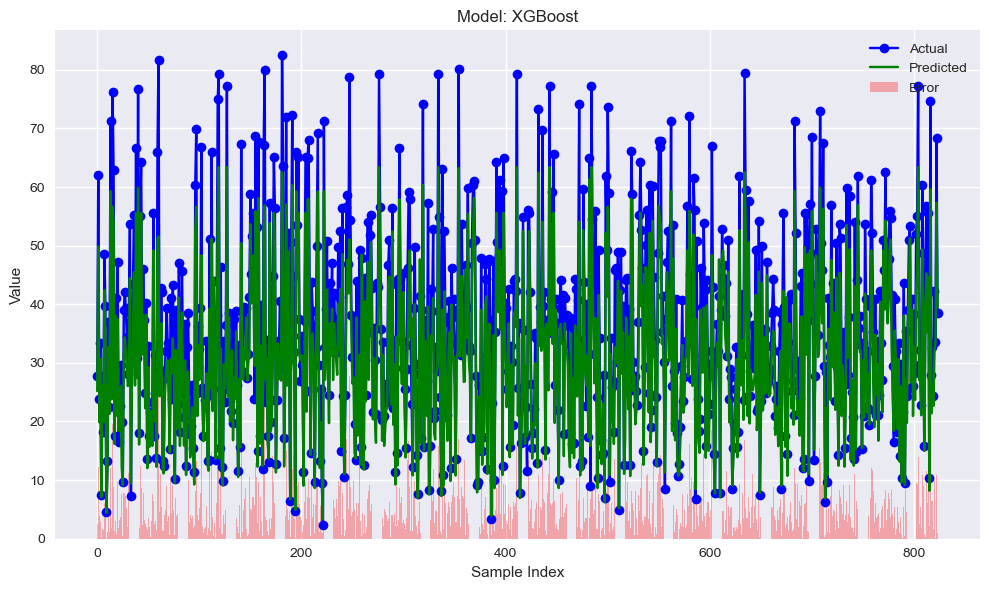

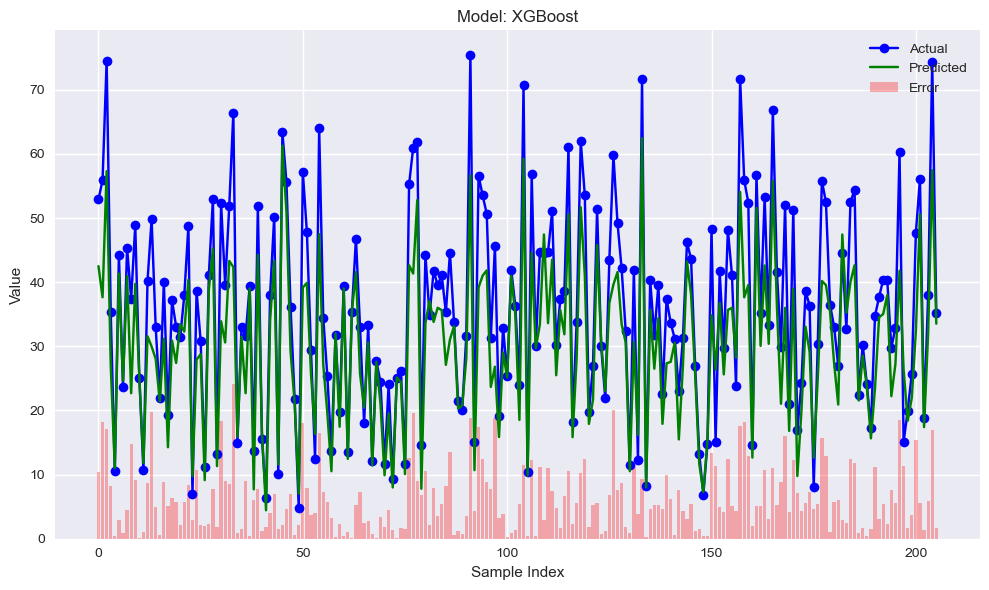

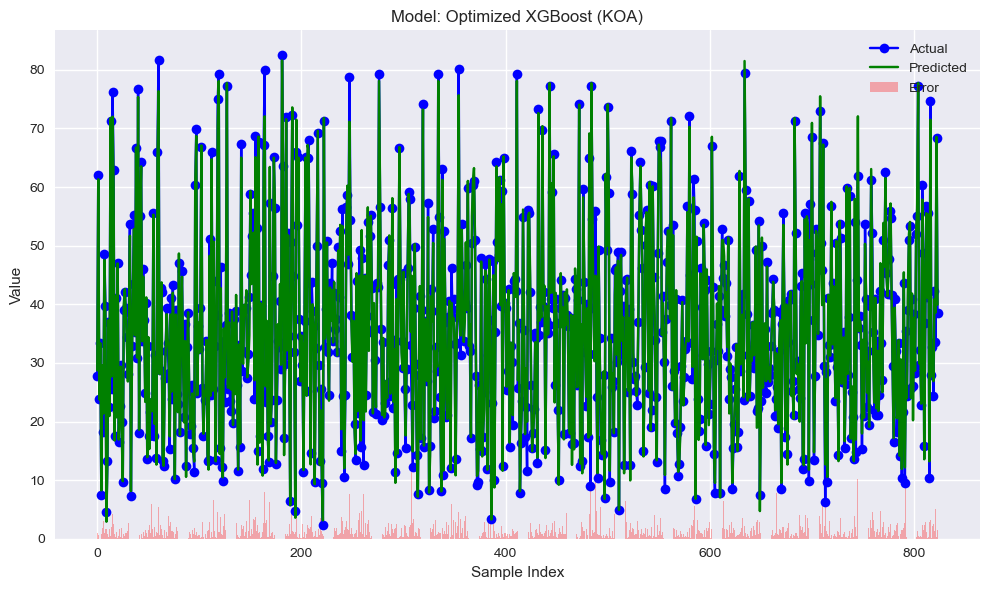

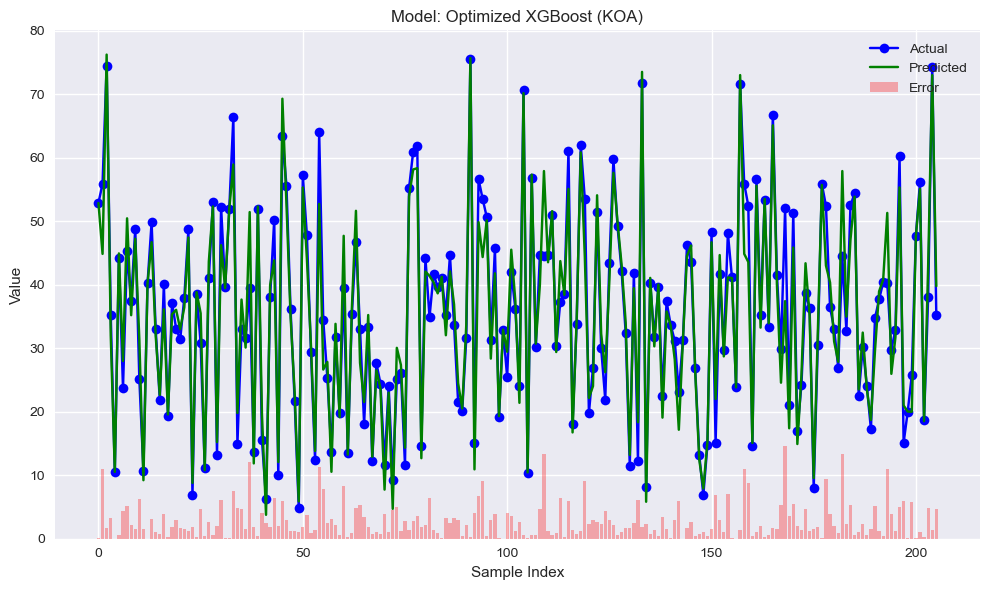

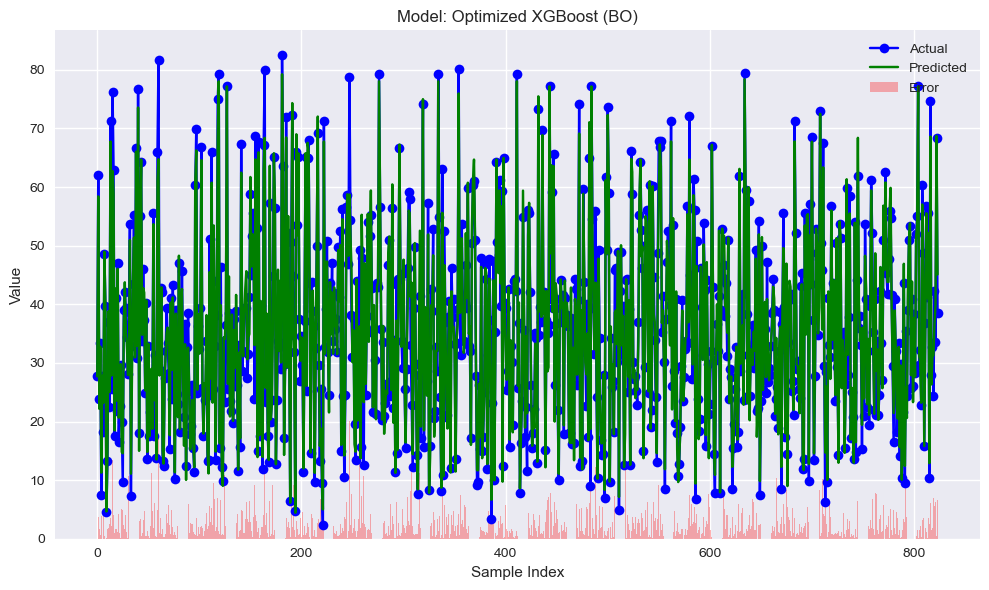

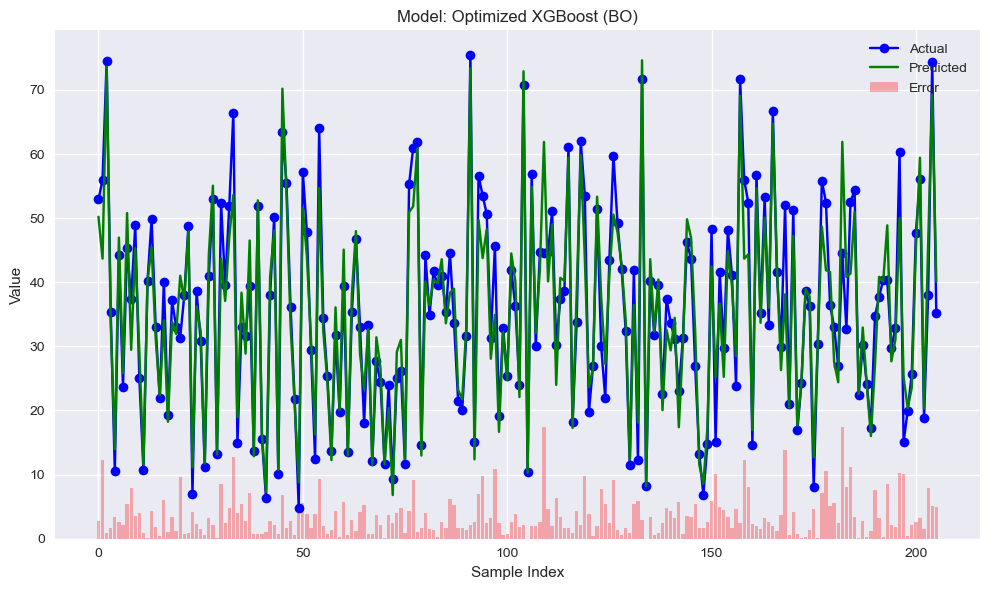

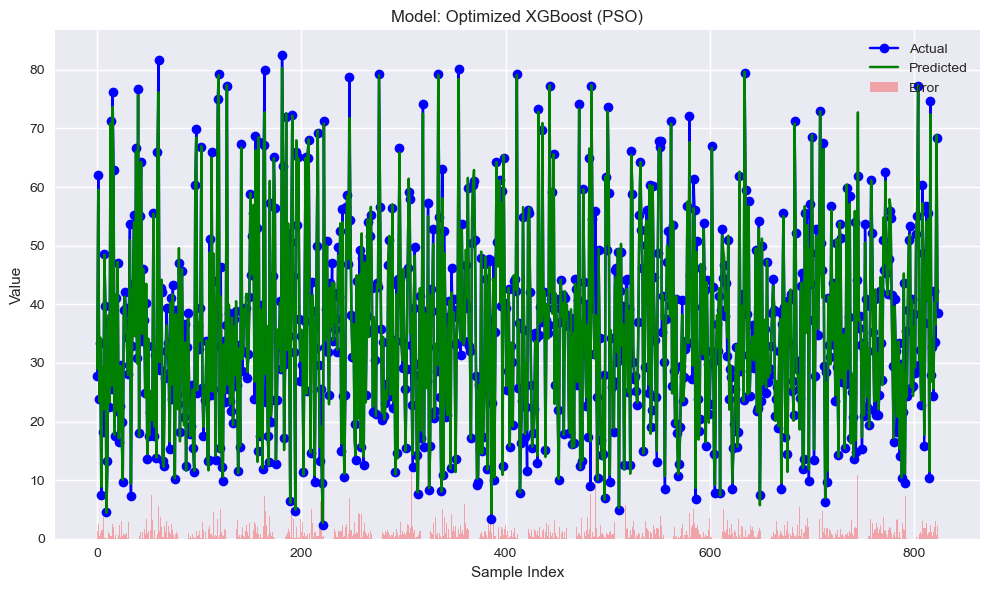

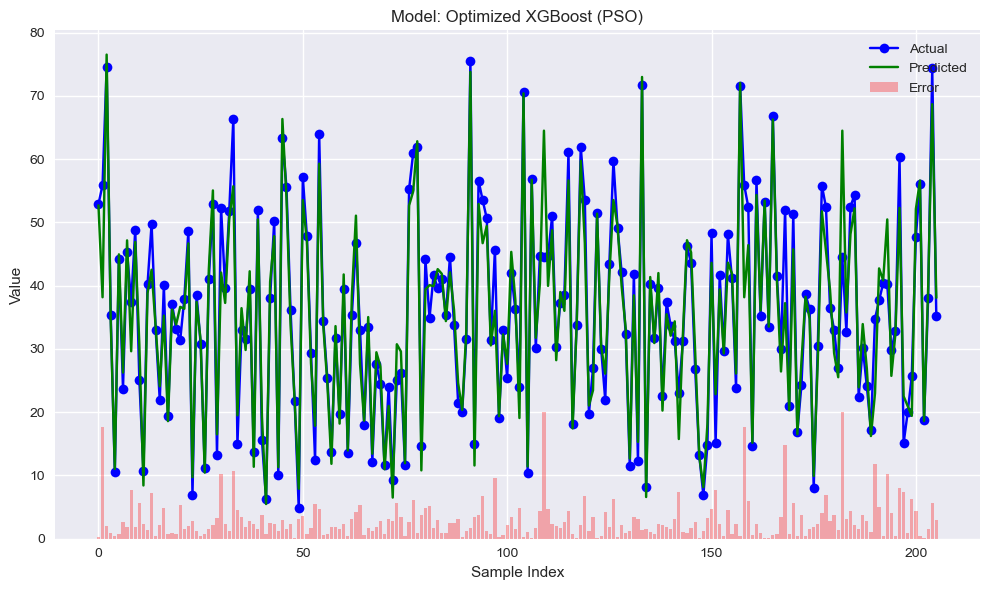

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, mean_squared_log_error,
    accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, 
    jaccard_score, matthews_corrcoef, cohen_kappa_score, hamming_loss, confusion_matrix
)
import time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import joblib
import random
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from pyswarm import pso

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

class KOA:
    """Optimized Krill Herd Optimization Algorithm"""
    def __init__(self, model, param_space, X_train, y_train, 
                 n_krill=10, max_iter=20, 
                 w=0.9, c1=1.5, c2=1.5, 
                 w_damp=0.99, c1_damp=0.99, c2_damp=0.99,
                 early_stopping=3):
        self.model = model
        self.param_space = param_space
        self.X_train = X_train
        self.y_train = y_train
        self.n_krill = n_krill
        self.max_iter = max_iter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.w_damp = w_damp
        self.c1_damp = c1_damp
        self.c2_damp = c2_damp
        self.early_stopping = early_stopping
        self.best_score = -np.inf
        self.best_params = None
        self.convergence_curve = []
        self.no_improvement_count = 0
        
    def initialize_krill(self):
        """Improved initialization with Latin Hypercube Sampling"""
        population = []
        for i in range(self.n_krill):
            krill = {}
            for param, bounds in self.param_space.items():
                stratum_size = (bounds['max'] - bounds['min']) / self.n_krill
                lower = bounds['min'] + i * stratum_size
                upper = bounds['min'] + (i + 1) * stratum_size
                
                if bounds['type'] == 'int':
                    krill[param] = int(np.random.uniform(lower, upper))
                else:
                    krill[param] = np.random.uniform(lower, upper)
            population.append(krill)
        return population
    
    def evaluate_krill(self, params):
        """Enhanced evaluation with cross-validation"""
        try:
            model = self.model.set_params(**params)
            scores = cross_val_score(model, self.X_train, self.y_train,
                                   cv=5, scoring='r2', n_jobs=-1)
            return np.mean(scores) if not np.isnan(np.mean(scores)) else -np.inf
        except Exception as e:
            return -np.inf
    
    def adaptive_movement(self, current_iter, param, current_val, best_val, neighbor_val):
        """Adaptive movement with iteration-based scaling"""
        iter_scale = current_iter / self.max_iter
        cognitive = self.c1 * (1 - 0.5*iter_scale) * random.random() * (best_val - current_val)
        social = self.c2 * (0.5 + 0.5*iter_scale) * random.random() * (neighbor_val - current_val)
        return self.w * current_val + cognitive + social
    
    def run(self):
        """Execute the optimized KOA with adaptive mechanisms"""
        population = self.initialize_krill()
        
        for iteration in range(self.max_iter):
            scores = [self.evaluate_krill(krill) for krill in population]
            current_best_idx = np.argmax(scores)
            current_best_score = scores[current_best_idx]
            
            if current_best_score > self.best_score:
                self.best_score = current_best_score
                self.best_params = population[current_best_idx].copy()
                self.no_improvement_count = 0
            else:
                self.no_improvement_count += 1
            
            self.convergence_curve.append(self.best_score)
            
            if self.no_improvement_count >= self.early_stopping:
                print(f"Early stopping at iteration {iteration+1}")
                break
            
            new_population = []
            for i in range(self.n_krill):
                new_krill = {}
                for param, bounds in self.param_space.items():
                    movement = self.adaptive_movement(
                        iteration,
                        param,
                        population[i][param],
                        self.best_params[param] if self.best_params is not None else population[current_best_idx][param],
                        population[current_best_idx][param]
                    )
                    
                    if bounds['type'] == 'int':
                        new_val = int(movement)
                        new_val = max(bounds['min'], min(bounds['max'], new_val))
                    else:
                        new_val = movement
                        new_val = max(bounds['min'], min(bounds['max'], new_val))
                    
                    new_krill[param] = new_val
                new_population.append(new_krill)
            
            if iteration > self.max_iter//2:
                top_indices = np.argsort(scores)[-3:]
                for i, idx in enumerate(top_indices):
                    if i == 0:
                        new_population[i] = self.best_params.copy()
                    else:
                        new_population[i] = population[idx].copy()
            
            self.w *= self.w_damp
            self.c1 *= self.c1_damp
            self.c2 *= self.c2_damp
            population = new_population
            
            print(f"Iteration {iteration+1}/{self.max_iter}, Best R2: {self.best_score:.4f}")
        
        return self.best_params, self.best_score

class ConcreteStrengthPredictor:
    def __init__(self, filepath):
        self.filepath = filepath
        self.models = {}
        self.results = []
        self.best_model = None
        self.strength_bins = [0, 25, 50, np.inf]
        self.strength_labels = ['Low', 'Medium', 'High']
        self.output_dir = os.path.join(os.path.dirname(self.filepath), 'Output_Using_New_Features')
        
    def load_and_preprocess(self):
        """Load and preprocess data with feature engineering"""
        data = pd.read_csv(self.filepath)
        
        # Feature engineering
        data['total_binder'] = data['cement'] + data['blast_furnace_slag'] + data['fly_ash']
        data['water_binder_ratio'] = data['water'] / (data['total_binder'] + 1e-6)
        data['aggregate_ratio'] = data['coarse_aggregate'] / (data['fine_aggregate'] + 1e-6)
        data['age_log'] = np.log1p(data['age'])
        
        X = data.drop(columns=['concrete_compressive_strength'])
        y = data['concrete_compressive_strength']
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        
        self.preprocessor = Pipeline([
            ('scaler', MinMaxScaler()),
            ('transformer', PowerTransformer(method='yeo-johnson')),
            ('feature_selector', SelectKBest(score_func=f_regression, k=8))
        ])
        
        self.X_train = self.preprocessor.fit_transform(self.X_train, self.y_train)
        self.X_test = self.preprocessor.transform(self.X_test)
        self.feature_names = self.preprocessor.get_feature_names_out()

    def plot_feature_distributions(self):
        """Plot distributions of all features after scaling and transformation"""
        os.makedirs(self.output_dir, exist_ok=True)

        plt.figure(figsize=(15, 10))
        for i in range(self.X_train.shape[1]):
            plt.subplot(3, 4, i+1)
            sns.histplot(self.X_train[:, i], kde=True)
            plt.title(f'Distribution: {self.feature_names[i]}')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'feature_distributions.png'))
        plt.close()

    def plot_feature_target_relationships(self):
        """Plot relationships between features and target"""
        os.makedirs(self.output_dir, exist_ok=True)

        plt.figure(figsize=(15, 10))
        for i in range(self.X_train.shape[1]):
            plt.subplot(3, 4, i+1)
            sns.scatterplot(x=self.X_train[:, i], y=self.y_train)
            plt.title(f'{self.feature_names[i]} vs Strength')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'feature_target_relationships.png'))
        plt.close()

    def analyze_features(self):
        """Perform comprehensive feature analysis"""
        self.plot_feature_distributions()
        self.plot_correlation_heatmap()
        self.plot_feature_target_relationships()

    def plot_correlation_heatmap(self):
        """Plot Pearson correlation heatmap"""
        os.makedirs(self.output_dir, exist_ok=True)

        df = pd.DataFrame(self.X_train, columns=self.feature_names)
        df['concrete_compressive_strength'] = self.y_train.values

        plt.figure(figsize=(12, 8))
        corr_matrix = df.corr(method='pearson')
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                    fmt='.2f', linewidths=0.5)
        plt.title('Pearson Correlation Heatmap')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'pearson_correlation_heatmap.png'))
        plt.close()

    def initialize_baseline_models(self):
        """Initialize baseline models for comparison"""
        self.models = {
            "AdaBoost": AdaBoostRegressor(
                n_estimators=100,
                learning_rate=0.001,
                loss='square',
                random_state=42
            ),
            "LightGBM": LGBMRegressor(
                n_estimators=1000,
                learning_rate=0.001,
                max_depth=-1,
                num_leaves=31,
                min_child_samples=20,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1
            ),
            "Gradient Boosting": GradientBoostingRegressor(
                n_estimators=500,
                learning_rate=0.005,
                max_depth=3,
                min_samples_split=2,
                min_samples_leaf=1,
                subsample=0.9,
                random_state=42
            ),
            "XGBoost": XGBRegressor(
                n_estimators=200,
                learning_rate=0.01,
                max_depth=6,
                random_state=42,
                n_jobs=-1
            )
        }
    
    def optimize_xgboost_bo(self):
        """Optimize XGBoost using Bayesian Optimization with independent parameters"""
        search_spaces = {
            'learning_rate': Real(0.001, 0.8),
            'max_depth': Integer(3, 10),
            'min_child_weight': Integer(1, 10),
            'subsample': Real(0.1, 0.5),
            'colsample_bytree': Real(0.5, 1.0),
            'gamma': Real(0, 1),
            'reg_alpha': Real(0, 1),
            'reg_lambda': Real(0, 2),
            'n_estimators': Integer(50, 100)
        }

        opt = BayesSearchCV(
            estimator=XGBRegressor(random_state=42, n_jobs=-1),
            search_spaces=search_spaces,
            n_iter=10,
            cv=3,
            scoring='r2',
            random_state=42,
            n_jobs=-1
        )

        opt.fit(self.X_train, self.y_train)

        optimized_xgb = opt.best_estimator_
        self.models["Optimized XGBoost (BO)"] = optimized_xgb
        return optimized_xgb

    def optimize_xgboost_pso(self):
        """Optimize XGBoost using PSO with independent parameters"""
        def objective_function(params):
            learning_rate = params[0]
            max_depth = int(params[1])
            subsample = params[2]
            reg_lambda = params[3]
            n_estimators = int(params[4])

            model = XGBRegressor(
                learning_rate=learning_rate,
                max_depth=max_depth,
                subsample=subsample,
                reg_lambda=reg_lambda,
                n_estimators=n_estimators,
                random_state=42,
                n_jobs=-1
            )

            scores = cross_val_score(model, self.X_train, self.y_train, 
                                   cv=3, scoring='r2', n_jobs=-1)
            return -np.mean(scores)  # Negative because PSO minimizes

        # Parameter bounds:
        # [learning_rate, max_depth, subsample, reg_lambda, n_estimators]
        lb = [0.001, 3, 0.1, 0, 50]    # Lower bounds
        ub = [0.4, 8, 0.5, 2, 100]     # Upper bounds

        best_params, best_score = pso(
            objective_function,
            lb, ub,
            swarmsize=10,
            maxiter=10,
            minstep=1e-2,
            minfunc=1e-2,
            debug=True
        )

        optimized_xgb = XGBRegressor(
            learning_rate=best_params[0],
            max_depth=int(best_params[1]),
            subsample=best_params[2],
            reg_lambda=best_params[3],
            n_estimators=int(best_params[4]),
            random_state=42,
            n_jobs=-1
        )

        optimized_xgb.fit(self.X_train, self.y_train)
        self.models["Optimized XGBoost (PSO)"] = optimized_xgb
        return optimized_xgb

    def optimize_xgboost(self):
        """Optimize XGBoost using KOA with independent parameters"""
        param_space = {
            'learning_rate': {'type': 'float', 'min': 0.001, 'max': 0.3},
            'max_depth': {'type': 'int', 'min': 3, 'max': 12},
            'subsample': {'type': 'float', 'min': 0.1, 'max': 0.5},
            'colsample_bytree': {'type': 'float', 'min': 0.1, 'max': 0.5},
            'gamma': {'type': 'float', 'min': 0, 'max': 1},
            'reg_alpha': {'type': 'float', 'min': 0, 'max': 1},
            'reg_lambda': {'type': 'float', 'min': 0, 'max': 2},
            'min_child_weight': {'type': 'int', 'min': 1, 'max': 10},
            'n_estimators': {'type': 'int', 'min': 50, 'max':100}
        }

        koa = KOA(
            model=XGBRegressor(random_state=42, n_jobs=-1),
            param_space=param_space,
            X_train=self.X_train,
            y_train=self.y_train,
            n_krill=10,
            max_iter=15,
            early_stopping=3
        )

        best_params, best_score = koa.run()

        optimized_xgb = XGBRegressor(
            **best_params,
            random_state=42,
            n_jobs=-1
        )
        optimized_xgb.fit(self.X_train, self.y_train)
        self.models["Optimized XGBoost (KOA)"] = optimized_xgb
        return optimized_xgb
    
    def calculate_rmsle(self, y_true, y_pred, model_name):
        """Calculate RMSLE with absolute values to handle negatives"""
        os.makedirs(self.output_dir, exist_ok=True)
        model_output_dir = os.path.join(self.output_dir, f"{model_name}_plots")
        os.makedirs(model_output_dir, exist_ok=True)
            
        output_path = os.path.join(model_output_dir, f'Error in {model_name}.png')
        
        y_true = np.abs(np.array(y_true))
        y_pred = np.abs(np.array(y_pred))
        error = np.abs(y_true - y_pred)

        plt.figure(figsize=(10, 6))
        plt.plot(y_true, label='Actual', marker='o', color='blue')
        plt.plot(y_pred, label='Predicted', marker='x', color='green')
        plt.bar(range(len(error)), error, alpha=0.3, label='Error', color='red')

        plt.title(f"Model: {model_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(output_path)  
        return np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    def evaluate_model(self, model, model_name):
        start_train = time.time()
        model.fit(self.X_train, self.y_train)
        end_train = time.time()

        start_test = time.time()
        y_pred_train = model.predict(self.X_train)
        y_pred_test = model.predict(self.X_test)
        end_test = time.time()

        metrics = {
            "Model": model_name,
            "Train_R2": r2_score(self.y_train, y_pred_train),
            "Test_R2": r2_score(self.y_test, y_pred_test),
            "Train_MSE": mean_squared_error(self.y_train, y_pred_train),
            "Test_MSE": mean_squared_error(self.y_test, y_pred_test),
            "Train_MAE": mean_absolute_error(self.y_train, y_pred_train),
            "Test_MAE": mean_absolute_error(self.y_test, y_pred_test),
            "Train_RMSE": np.sqrt(mean_squared_error(self.y_train, y_pred_train)),
            "Test_RMSE": np.sqrt(mean_squared_error(self.y_test, y_pred_test)),
            "Train_RMSLE": self.calculate_rmsle(self.y_train, y_pred_train, model_name),
            "Test_RMSLE": self.calculate_rmsle(self.y_test, y_pred_test, model_name),
            "Train_MAPE": np.mean(np.abs((self.y_train - y_pred_train) / self.y_train)) * 100,
            "Test_MAPE": np.mean(np.abs((self.y_test - y_pred_test) / self.y_test)) * 100,
        }

        tolerance = 0.2
        y_train_within_tol = (np.abs((self.y_train - y_pred_train) / self.y_train) <= tolerance)
        y_test_within_tol = (np.abs((self.y_test - y_pred_test) / self.y_test) <= tolerance)

        y_train_true = np.ones_like(y_train_within_tol, dtype=bool)
        y_test_true = np.ones_like(y_test_within_tol, dtype=bool)

        def calculate_metrics(y_true, y_pred):
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
            fdr = fp / (fp + tp) if (fp + tp) > 0 else 0
            for_ = fn / (fn + tn) if (fn + tn) > 0 else 0
            npv = tn / (tn + fn) if (tn + fn) > 0 else 0
            f1 = f1_score(y_true, y_pred)
            jaccard = jaccard_score(y_true, y_pred)
            mcc = matthews_corrcoef(y_true, y_pred)
            kappa = cohen_kappa_score(y_true, y_pred)
            markdness = (precision + npv) - 1
            fm = np.sqrt(precision * recall)
            hamming = hamming_loss(y_true, y_pred)

            return {
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "Specificity": specificity,
                "FPR": fpr,
                "FNR": fnr,
                "FDR": fdr,
                "FOR": for_,
                "NPV": npv,
                "F1": f1,
                "Jaccard": jaccard,
                "MCC": mcc,
                "Kappa": kappa,
                "Markdness": markdness,
                "FM": fm,
                "Hamming Loss": hamming
            }

        train_metrics = calculate_metrics(y_train_true, y_train_within_tol)
        test_metrics = calculate_metrics(y_test_true, y_test_within_tol)

        for metric_name in train_metrics.keys():
            metrics[f"Train_{metric_name}"] = train_metrics[metric_name]
            metrics[f"Test_{metric_name}"] = test_metrics[metric_name]

        metrics.update({
            "Training Time (s)": end_train - start_train,
            "Testing Time (s)": end_test - start_test
        })
        
        self.plot_model_fit_curves(model, model_name)

        return metrics
    
    def plot_model_comparison(self, results_df):
        plt.style.use('seaborn')
        plt.rcParams['figure.figsize'] = (15, 20)

        os.makedirs(self.output_dir, exist_ok=True)
        
        pdf_path = os.path.join(self.output_dir, 'model_comparison_results.pdf')
        with PdfPages(pdf_path) as pdf:
            fig, axes = plt.subplots(5, 2)
            fig.suptitle('Model Performance Comparison', fontsize=16)

            metrics_config = [
                ('R2 Score', ['Train_R2', 'Test_R2'], 0, 0, ['skyblue', 'navy'], (0, 1)),
                ('Accuracy', ['Train_Accuracy', 'Test_Accuracy'], 0, 1, ['lightgreen', 'darkgreen'], None),
                ('Precision', ['Train_Precision', 'Test_Precision'], 1, 0, ['lightgreen', 'darkgreen'], None),
                ('Recall', ['Train_Recall', 'Test_Recall'], 1, 1, ['lightgreen', 'darkgreen'], None),
                ('F1 Score', ['Train_F1', 'Test_F1'], 2, 0, ['lightgreen', 'darkgreen'], None),
                ('MSE', ['Train_MSE', 'Test_MSE'], 2, 1, ['salmon', 'darkred'], None),
                ('RMSE', ['Train_RMSE', 'Test_RMSE'], 3, 0, ['salmon', 'darkred'], None),
                ('RMSLE', ['Train_RMSLE', 'Test_RMSLE'], 3, 1, ['salmon', 'darkred'], None),
                ('MAE', ['Train_MAE', 'Test_MAE'], 4, 0, ['salmon', 'darkred'], None),
                ('MAPE', ['Train_MAPE', 'Test_MAPE'], 4, 1, ['salmon', 'darkred'], None)
            ]

            for title, cols, row, col, colors, ylim in metrics_config:
                results_df.sort_values(cols[1]).plot(
                    x='Model', y=cols, 
                    kind='bar', ax=axes[row, col], color=colors)
                axes[row, col].set_title(title)
                axes[row, col].set_ylabel(title.split()[0])
                if ylim:
                    axes[row, col].set_ylim(ylim)

            plt.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)

            for title, cols, _, _, colors, ylim in metrics_config:
                fig, ax = plt.subplots(figsize=(12, 6))
                results_df.sort_values(cols[1]).plot(
                    x='Model', y=cols, 
                    kind='bar', ax=ax, color=colors)
                ax.set_title(title)
                ax.set_ylabel(title.split()[0])
                if ylim:
                    ax.set_ylim(ylim)
                plt.tight_layout()
                pdf.savefig(fig)
                plt.close(fig)

        print(f"All plots saved to '{pdf_path}'")
        
    def plot_model_fit_curves(self, model, model_name):
        """Create fit curves and residual plots"""
        try:
            os.makedirs(self.output_dir, exist_ok=True)

            y_pred_train = model.predict(self.X_train)
            y_pred_test = model.predict(self.X_test)

            model_output_dir = os.path.join(self.output_dir, f"{model_name}_plots")
            os.makedirs(model_output_dir, exist_ok=True)

            def plot_with_equation(x, y, ax, color, dataset_name):
                slope, intercept = np.polyfit(x, y, 1)
                reg_line = slope * x + intercept
                ax.plot(x, reg_line, color='red', linewidth=2)
                equation = f'y = {slope:.2f}x + {intercept:.2f}' if intercept >= 0 else f'y = {slope:.2f}x - {abs(intercept):.2f}'
                ax.text(0.05, 0.85, f'{dataset_name} Fit: {equation}',
                       transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

            plt.figure(figsize=(12, 12))

            ax1 = plt.subplot(2, 1, 1)
            sns.scatterplot(x=self.y_train, y=y_pred_train, alpha=0.3, color='blue')
            plot_with_equation(self.y_train, y_pred_train, ax1, 'red', 'Training')
            plt.plot([self.y_train.min(), self.y_train.max()], 
                     [self.y_train.min(), self.y_train.max()], 
                     'k--', linewidth=2)
            plt.title(f'{model_name} - Training Set: Actual vs Predicted', fontsize=14)
            plt.xlabel('Actual Strength (MPa)', fontsize=12)
            plt.ylabel('Predicted Strength (MPa)', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)

            train_r2 = r2_score(self.y_train, y_pred_train)
            train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
            plt.text(0.05, 0.75, f'R² = {train_r2:.4f}\nRMSE = {train_rmse:.4f} MPa',
                     transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))

            ax2 = plt.subplot(2, 1, 2)
            sns.scatterplot(x=self.y_test, y=y_pred_test, alpha=0.3, color='green')
            plot_with_equation(self.y_test, y_pred_test, ax2, 'red', 'Testing')
            plt.plot([self.y_test.min(), self.y_test.max()], 
                     [self.y_test.min(), self.y_test.max()], 
                     'k--', linewidth=2)
            plt.title(f'{model_name} - Testing Set: Actual vs Predicted', fontsize=14)
            plt.xlabel('Actual Strength (MPa)', fontsize=12)
            plt.ylabel('Predicted Strength (MPa)', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)

            test_r2 = r2_score(self.y_test, y_pred_test)
            test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))
            plt.text(0.05, 0.75, f'R² = {test_r2:.4f}\nRMSE = {test_rmse:.4f} MPa',
                     transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8))

            plt.tight_layout()

            output_path = os.path.join(model_output_dir, f'{model_name}_fit_curve.png')
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"Fit curve saved to: {output_path}")
            plt.close()

            plt.figure(figsize=(12, 6))
            residuals_train = self.y_train - y_pred_train
            residuals_test = self.y_test - y_pred_test

            plt.scatter(y_pred_train, residuals_train, alpha=0.3, color='blue', label='Training')
            plt.scatter(y_pred_test, residuals_test, alpha=0.3, color='green', label='Testing')
            plt.axhline(y=0, color='red', linestyle='--')
            plt.title(f'{model_name} - Residual Plot', fontsize=14)
            plt.xlabel('Predicted Strength (MPa)', fontsize=12)
            plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)

            residual_path = os.path.join(model_output_dir, f'{model_name}_residual_plot.png')
            plt.savefig(residual_path, dpi=300, bbox_inches='tight')
            print(f"Residual plot saved to: {residual_path}")
            plt.close()

        except Exception as e:
            print(f"Error generating plots for {model_name}: {str(e)}")
    
    def run(self):
        os.makedirs(self.output_dir, exist_ok=True)
        print(f"All outputs will be saved to: {self.output_dir}")
        
        self.load_and_preprocess()
        self.initialize_baseline_models()
        self.analyze_features()
        
        for name, model in list(self.models.items()):
            print(f"\nEvaluating {name}...")
            metrics = self.evaluate_model(model, name)
            self.results.append(metrics)
        
        self.optimize_xgboost()
        self.optimize_xgboost_bo()
        self.optimize_xgboost_pso()
        
        for name in ["Optimized XGBoost (KOA)", "Optimized XGBoost (BO)", "Optimized XGBoost (PSO)"]:
            print(f"\nEvaluating {name}...")
            metrics = self.evaluate_model(self.models[name], name)
            self.results.append(metrics)
        
        results_df = pd.DataFrame(self.results)
        results_df = results_df.sort_values("Test_R2", ascending=False)
        
        csv_path = os.path.join(self.output_dir, 'model_comparison_results.csv')
        results_df.to_csv(csv_path, index=False)
        print(f"Results saved to: {csv_path}")
        
        self.plot_model_comparison(results_df)
        
        best_model_path = os.path.join(self.output_dir, 'best_concrete_model.pkl')
        self.best_model = self.models[results_df.iloc[0]['Model']]
        joblib.dump(self.best_model, best_model_path)
        print(f"\nBest model ({results_df.iloc[0]['Model']}) saved to: {best_model_path}")

if __name__ == "__main__":
    predictor = ConcreteStrengthPredictor(r"C:\Users\psaur\Downloads\Shrajan\Shrajan_Final_Scripts_Output\concrete_data.csv")
    predictor.run()